In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wrangling

In [2]:
df = pd.read_csv('Data/nfl_player_stats_by_career_2020.csv')

In [3]:
# set option so I'm able to see all my columns
pd.set_option('display.max_columns', None)

#I've filtered out non-QBs by including only player's who've thrown over 800 passes in there career
# in the modern nfl a quarter back will throw 800 passes in about 3 seasons.
qb_df = df[df['attempted_passes'] > 800]

#dropped all columns that do not pertain to QBs.
qb_df = qb_df.dropna(axis=1)

#dropped unnecessary columns
qb_df.drop(columns=['id', 'sacks', 'year', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 
                    'longest_pass', 'longest_rush', 'touches', 'yards_lost_to_sacks', 'yards_per_touch',
                    'yards_recovered_from_fumble', 'birth_date', 'height', 'weight', 'season', 'approximate_value'], inplace=True, errors='ignore')


#split-up and dropped the qb_record column
qb_df[['wins','loss', 'tie']] = qb_df['qb_record'].str.split('-',expand=True)

qb_df = qb_df.astype({'wins': 'int64', 'loss': 'int64','tie': 'int64'})

qb_df.drop(columns=['qb_record'], inplace=True)

#normalize some features per game
qb_df['fumbles_per_game'] = qb_df['fumbles'] / qb_df['games']
qb_df['int_per_game'] = qb_df['interceptions_thrown'] / qb_df['games']
qb_df['win_per'] = qb_df['wins'] / qb_df['games']
qb_df.drop(columns=['fumbles', 'interceptions_thrown', 'loss', 'tie'], inplace=True)

In [4]:
#import and wrangler HOF csv.
hof = pd.read_csv('Data/Hall of Fame List.csv')

hof['hof'] = 1

hof = hof[['name', 'hof']]

hof

,name,hof
0,Steve Atwater,1
1,Isaac Bruce,1
2,Harold Carmichael,1
3,Jimbo Covert,1
4,Bobby Dillon,1
...,...,...
289,Cal Hubbard,1
290,Don Hutson,1
291,Bronko Nagurski,1
292,Ernie Nevers,1


In [5]:
#merged qb and HOF datasets
qb_df = pd.merge(qb_df, hof, on='name', how='left')

qb_df.set_index('player_id', inplace=True)

In [6]:
#data cleaning
qb_df.drop(columns='name', inplace=True)
qb_df['hof'] = qb_df['hof'].replace(np.NaN, 0)

In [7]:
#import/wrangle/merge player season data to get years played in NFL
sdf = pd.read_csv('Data/nfl_player_stats_by_season_2020.csv')

sdf_qb = sdf[sdf['player_id'].isin(qb_df.index)]

sdf_pb_group = sdf_qb.groupby('player_id').agg(start_year = ('season' , 'min'), end_year = ('season', 'max'))

qb_df = pd.merge(qb_df, sdf_pb_group, on='player_id', how='left')

#filtered out active/ineligible QBs from the data set
test = qb_df[qb_df['end_year'] >= 2015]
qb_df = qb_df[qb_df['end_year'] < 2015]

In [8]:
qb_df.head()

,adjusted_net_yards_per_pass_attempt,adjusted_yards_per_attempt,attempted_passes,completed_passes,fourth_quarter_comebacks,game_winning_drives,games,games_started,interception_percentage,net_yards_per_pass_attempt,passing_completion,passing_touchdown_percentage,passing_touchdowns,passing_yards,passing_yards_per_attempt,quarterback_rating,rush_attempts,rush_attempts_per_game,rush_touchdowns,rush_yards,rush_yards_per_attempt,rush_yards_per_game,rushing_and_receiving_touchdowns,times_sacked,yards_from_scrimmage,yards_per_completed_pass,yards_per_game_played,wins,fumbles_per_game,int_per_game,win_per,hof,start_year,end_year
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CampJa00,5.47,6.3,2518.0,1519.0,7.0,10.0,90.0,79.0,2.4,5.83,60.3,3.5,87.0,16771.0,6.7,81.7,240.0,2.7,6.0,1204.0,5.0,13.4,6.0,170.0,1204.0,11.0,186.3,32,0.577778,0.666667,0.355556,0.0,2006.0,2014.0
OrtoKy00,5.54,6.3,2712.0,1613.0,8.0,9.0,87.0,82.0,2.5,5.92,59.5,3.7,101.0,18037.0,6.7,81.2,126.0,1.4,4.0,296.0,2.3,3.4,4.0,165.0,296.0,11.2,207.3,42,0.402299,0.793103,0.482759,0.0,2005.0,2014.0
PondCh00,4.60,5.5,1057.0,632.0,2.0,3.0,38.0,36.0,3.4,5.34,59.8,3.6,38.0,6658.0,6.3,75.9,126.0,3.3,7.0,639.0,5.1,16.8,7.0,95.0,624.0,10.5,175.2,14,0.526316,0.947368,0.368421,0.0,2011.0,2014.0
CarrDa00,4.34,5.5,2267.0,1353.0,7.0,11.0,94.0,79.0,3.1,5.09,59.7,2.9,65.0,14452.0,6.4,74.9,305.0,3.2,9.0,1328.0,4.4,14.1,9.0,267.0,1328.0,10.7,153.7,23,0.755319,0.755319,0.244681,0.0,2002.0,2012.0
BatcCh00,5.14,6.2,1604.0,908.0,9.0,11.0,81.0,55.0,3.2,5.78,56.6,3.8,61.0,11085.0,6.9,77.2,172.0,2.1,6.0,637.0,3.7,7.9,6.0,161.0,637.0,12.2,136.9,25,0.296296,0.641975,0.308642,0.0,1998.0,2012.0


# Train/Test Split

In [9]:
target = 'hof'
y = qb_df[target]
X = qb_df.drop(columns=target)

In [10]:
from sklearn.model_selection import train_test_split
#Train/test split, because I have a small imbalanced dataset I made sure to stratify my data
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Baseline

In [11]:
baseline_acc = y_train.value_counts(normalize=True).max()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.8827586206896552


# Build Model - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [13]:
np.random.seed(42) 

In [14]:
# Increasing hyperparameter C increases the accuracy score

log_model = make_pipeline(
       StandardScaler(),
       LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 100)
)

log_model.fit(X_train, y_train);

## Check Metrics - Logistic Regression

In [15]:
print('Training Accuracy Score:', log_model.score(X_train, y_train))
print('Validation Accuracy Score:', log_model.score(X_val, y_val))

Training Accuracy Score: 1.0
Validation Accuracy Score: 0.972972972972973


## Permutation Importance - Logistic Regression

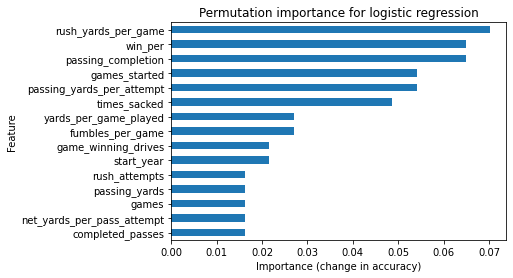

In [16]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(log_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].tail(15).plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for logistic regression');

# Build Model - Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
forest_model = RandomForestClassifier(max_depth=2, n_estimators=500)

forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=500)

## Check Metrics - Random Forest

In [19]:
print('FOREST: Training Accuracy:', forest_model.score(X_train, y_train))
print('FOREST: VAl Accuracy:', forest_model.score(X_val, y_val))

FOREST: Training Accuracy: 0.9655172413793104
FOREST: VAl Accuracy: 0.9459459459459459


## Permutation Importance - Random Forest

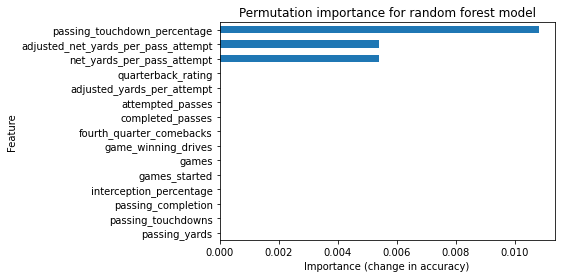

In [20]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(forest_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].tail(15).plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for random forest model');

# Build Model - XGBoost

In [21]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
boost_model = XGBClassifier(n_jobs=-1, random_state=42, n_estimators= 200, max_depth= 1, eta= 0.01, colsample_bytree= 0.6)

boost_model.fit(X_train, y_train);

## Check Metrics - XGBoost

In [23]:
print('Training accuracy:', boost_model.score(X_train, y_train))
print('Val accuracy:', boost_model.score(X_val, y_val))

Training accuracy: 0.9655172413793104
Val accuracy: 0.972972972972973


## Permutation Importance - XGBoost

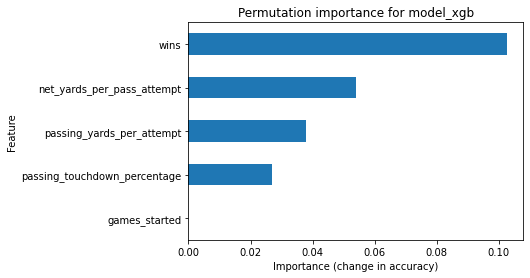

In [24]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(boost_model, X_val, y_val, n_jobs=-1, random_state=42)

data = {'mean_importance' : perm_imp['importances_mean'], 'std_importances' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('mean_importance', ascending=True, inplace=True)

df['mean_importance'].tail(5).plot(kind='barh')
plt.xlabel('Importance (change in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation importance for model_xgb');

# ROC-Curve compare Logistic Regression, Random Forest and XGBoost

In [25]:
from sklearn.metrics import plot_roc_curve

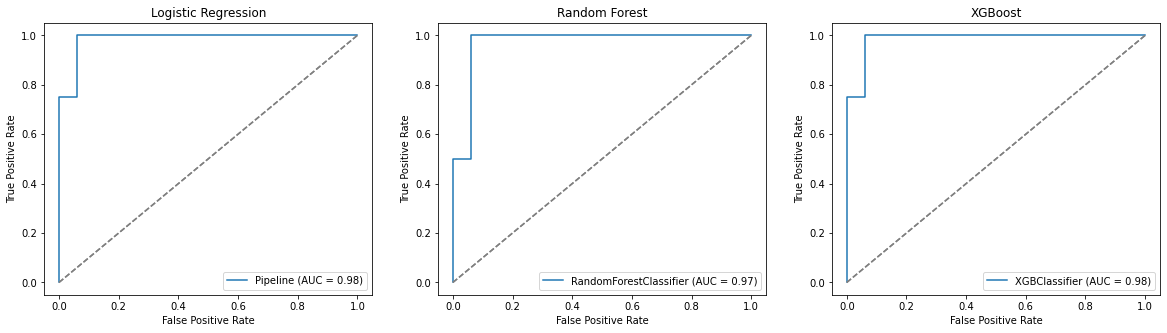

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,5))

plot_roc_curve(log_model, X_val, y_val, ax=ax1)
plot_roc_curve(forest_model, X_val, y_val, ax=ax2)
plot_roc_curve(boost_model, X_val, y_val, ax=ax3)

ax1.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax2.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax3.plot([(0,0), (1,1)], color='grey', linestyle='--')


ax1.set_title('Logistic Regression')
ax2.set_title('Random Forest')
ax3.set_title('XGBoost')

plt.show()

# Testing/Choosing a Model

Because I'm dealing with a small imbalanced dataset I feel it is importanct to use cross validation. However, using cross validation to start will limit some of the my ability to check permuation importance and check the accuracy/performance of my model. So I decided to run 3 models using a stratified train/set find the one that performed the best and use that model with a randomsearchcv. 

After running the three models, the XGBoost model gives me the best accuracy and the best ROC-curve. 

# XGboost with K-folds

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [28]:

xgboost_model1 = XGBClassifier()

param_space = {
         "max_depth": [1, 2, 3, 4],
         "eta": [0.3, 0.2, 0.1, 0.05, 0.01],
         "n_estimators": [100, 200, 300, 400, 500],
         "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1]
 }

xgboost_rand_search = RandomizedSearchCV(xgboost_model1, param_distributions=param_space, n_iter=20,
                                         scoring="accuracy", verbose=True, cv=StratifiedKFold(n_splits=5),
                                         n_jobs=-1, random_state=42)

xgboost_rand_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    3.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_

In [29]:
xgboost_rand_search.best_params_

{'n_estimators': 200, 'max_depth': 1, 'eta': 0.01, 'colsample_bytree': 0.6}

In [30]:
xgboost_rand_search.best_score_

0.9285285285285285

# Use model to predict the next HOF QBs

### Current players and players who've retired less than 5 years ago are ineligible. They are the perfect candidates to test my predictions on.

In [32]:
X_test = test.drop(columns='hof')

y_pred = xgboost_rand_search.predict(X_test)

results = pd.DataFrame(y_pred, columns=['hof'], index=X_test.index)

In [34]:
# QBs the model predicts will be the next to enter the HOF

results[results['hof'] == 1]

,hof
player_id,
WilsRu00,1.0
BreeDr00,1.0
RodgAa00,1.0
BradTo00,1.0
RivePh00,1.0
RyanMa00,1.0
RoetBe00,1.0
MannEl00,1.0
PalmCa00,1.0


# Shapley Plots

In [35]:
import shap

## Tom Brady

In [36]:
row = X_test[X_test.index == 'BradTo00']

explainer = shap.TreeExplainer(boost_model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

# Eli Manning

In [37]:
row = X_test[X_test.index == 'MannEl00']

explainer = shap.TreeExplainer(boost_model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

## Patrick Mahomes

In [38]:
row = X_test[X_test.index == 'MahoPa00']


explainer = shap.TreeExplainer(boost_model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

## Joe Flaco

In [39]:
row = X_test[X_test.index == 'FlacJo00']


explainer = shap.TreeExplainer(boost_model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

# PDP Charts for Most Important Features

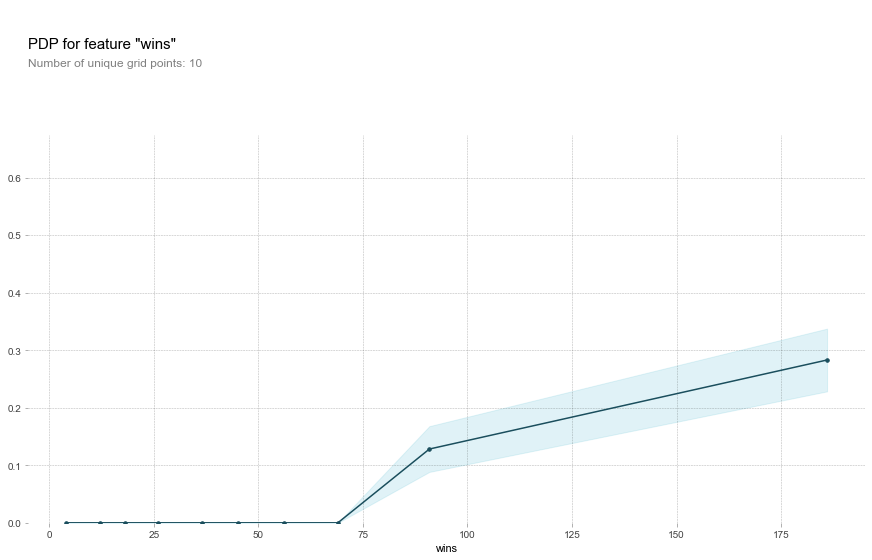

In [40]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'wins'

isolate = pdp_isolate(
    model=xgboost_rand_search,
    dataset=X, #
    model_features=X.columns,
    feature=feature
)

pdp_plot(isolate, feature_name=feature);

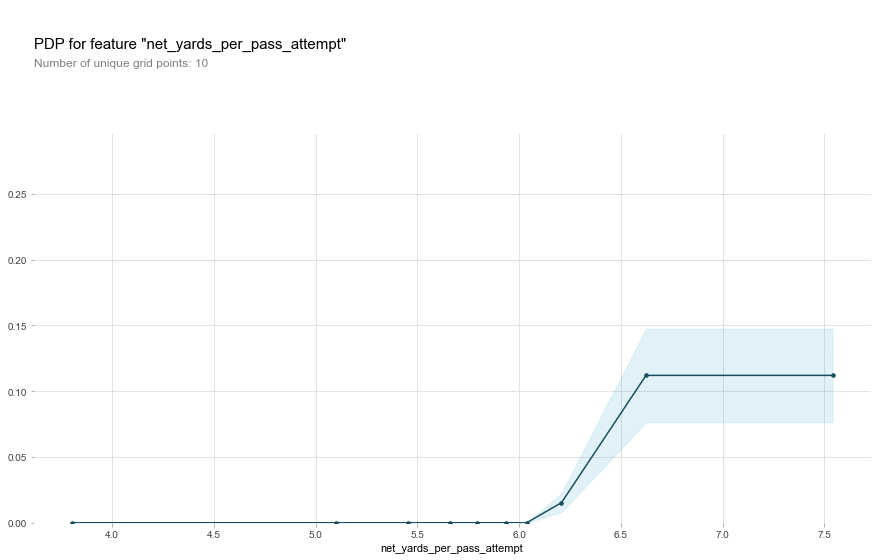

In [41]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'net_yards_per_pass_attempt'

isolate = pdp_isolate(
    model=xgboost_rand_search,
    dataset=X,
    model_features=X.columns,
    feature=feature
)

pdp_plot(isolate, feature_name=feature);

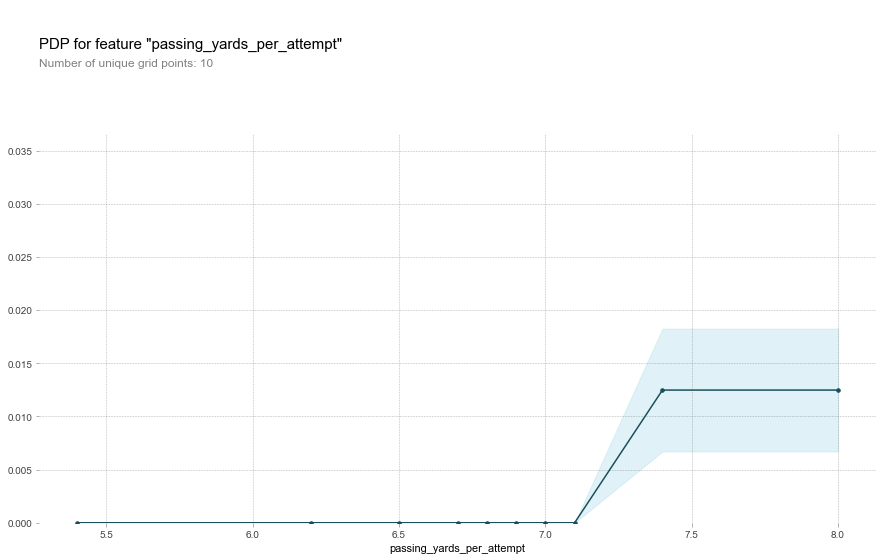

In [42]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'passing_yards_per_attempt'

isolate = pdp_isolate(
    model=xgboost_rand_search,
    dataset=X,
    model_features=X.columns,
    feature=feature
)

pdp_plot(isolate, feature_name=feature);